In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [60]:
# read the data
df_dataset = pd.read_csv("cleaned_ids2018_sampled.csv",encoding="latin-1")

In [61]:
# Displaying the data
df_dataset

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,146275,3389,6,5206015,9,11,1213,1948,661,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1,512109,443,6,60991608,14,14,1211,3396,875,0,...,20,116504.666667,117401.762867,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,807703,53,17,27292,1,1,45,163,45,45,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
3,491912,443,6,70343424,17,20,1118,5653,258,0,...,20,527683.500000,386311.526445,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,858679,53,17,137267,2,2,94,214,47,47,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252841,940974,64678,6,1397,5,2,935,267,935,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1252842,45433,51274,6,1,3,0,77,0,46,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1252843,912254,80,6,233,2,0,0,0,0,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1252844,990683,53,17,23818,1,1,34,204,34,34,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1


In [62]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252846 entries, 0 to 1252845
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1252846 non-null  int64  
 1   Dst Port           1252846 non-null  int64  
 2   Protocol           1252846 non-null  int64  
 3   Flow Duration      1252846 non-null  int64  
 4   Tot Fwd Pkts       1252846 non-null  int64  
 5   Tot Bwd Pkts       1252846 non-null  int64  
 6   TotLen Fwd Pkts    1252846 non-null  int64  
 7   TotLen Bwd Pkts    1252846 non-null  int64  
 8   Fwd Pkt Len Max    1252846 non-null  int64  
 9   Fwd Pkt Len Min    1252846 non-null  int64  
 10  Fwd Pkt Len Mean   1252846 non-null  float64
 11  Fwd Pkt Len Std    1252846 non-null  float64
 12  Bwd Pkt Len Max    1252846 non-null  int64  
 13  Bwd Pkt Len Min    1252846 non-null  int64  
 14  Bwd Pkt Len Mean   1252846 non-null  float64
 15  Bwd Pkt Len Std    1252846 non-n

In [63]:
## Taking care of missing data, Removing duplicates

In [64]:
# replace +ve and -ve infinity with NaN
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [65]:
# drop missing values (nan) 
df_dataset.dropna(inplace=True)

In [66]:
print(df_dataset.duplicated().sum())

117437


In [67]:
df_dataset.drop_duplicates(inplace = True)

In [68]:
print(df_dataset.duplicated().sum())

0


## Implementing binary classification


In [69]:
df_dataset["Label"].value_counts()

1     880060
4     124280
5      52051
2      35127
3      33817
6       7598
7       2028
8        301
9         91
10        46
11        10
Name: Label, dtype: int64

In [70]:
old_value = 1
new_value = 0
df_dataset['Label'] = df_dataset['Label'].replace(old_value, new_value)

In [71]:
for i in range(2, 12):
    old_value = i
    new_value = 1
    df_dataset['Label'] = df_dataset['Label'].replace(old_value, new_value)

In [72]:
df_dataset["Label"].value_counts()

0    880060
1    255349
Name: Label, dtype: int64

# # Balancing the data (Undersampling)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

RANDOM_STATE_SEED = 12

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = df_dataset
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [74]:
df1 = df[df["Label"] == 0][:255349]
df2 = df[df["Label"] == 1][:255349]
df_equal = pd.concat([ df1,df2], axis =0)

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [76]:
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df_equal["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df_equal["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df_equal["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df_equal["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

# Creating train/test split

In [77]:
train, test = train_test_split(df_equal, test_size=0.2)

In [78]:
# display columns
train.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg',
  

In [79]:
# feature info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408558 entries, 260100 to 989507
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         408558 non-null  int64  
 1   Dst Port           408558 non-null  int64  
 2   Protocol           408558 non-null  int64  
 3   Flow Duration      408558 non-null  int64  
 4   Tot Fwd Pkts       408558 non-null  int64  
 5   Tot Bwd Pkts       408558 non-null  int64  
 6   TotLen Fwd Pkts    408558 non-null  int64  
 7   TotLen Bwd Pkts    408558 non-null  int64  
 8   Fwd Pkt Len Max    408558 non-null  int64  
 9   Fwd Pkt Len Min    408558 non-null  int64  
 10  Fwd Pkt Len Mean   408558 non-null  float64
 11  Fwd Pkt Len Std    408558 non-null  float64
 12  Bwd Pkt Len Max    408558 non-null  int64  
 13  Bwd Pkt Len Min    408558 non-null  int64  
 14  Bwd Pkt Len Mean   408558 non-null  float64
 15  Bwd Pkt Len Std    408558 non-null  float64
 1

# Feature scaling 

In [80]:
min_max_scaler = MinMaxScaler().fit(train[['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']])

In [81]:
numerical_columns = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [82]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [83]:
train

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
260100,458755,53,17,2.191667e-06,0.503794,0.539864,0.000005,0.000001,0.000924,0.028082,...,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
277137,643382,41697,6,2.500000e-07,0.503810,0.539847,0.000000,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1049136,11947,80,6,2.270667e-04,0.503810,0.539847,0.000000,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
93890,623183,443,6,3.658334e-06,0.503825,0.539847,0.000009,0.000000,0.001036,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32687,399032,58160,6,8.941667e-06,0.503856,0.539882,0.000107,0.000005,0.021062,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532609,1741,21,6,8.333334e-09,0.503794,0.539864,0.000000,0.000000,0.000000,0.000000,...,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
255475,909524,443,6,2.506742e-03,0.503810,0.539847,0.000000,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
281948,962069,53,17,2.708334e-06,0.503794,0.539864,0.000005,0.000001,0.000946,0.028767,...,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
163772,205596,80,6,9.833334e-07,0.503810,0.539847,0.000000,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [84]:
train.drop(['Unnamed: 0'], axis=1,inplace=True)
test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [85]:
train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
260100,53,17,2.191667e-06,0.503794,0.539864,0.000005,0.000001,0.000924,0.028082,0.006574,...,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
277137,41697,6,2.500000e-07,0.503810,0.539847,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1049136,80,6,2.270667e-04,0.503810,0.539847,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
93890,443,6,3.658334e-06,0.503825,0.539847,0.000009,0.000000,0.001036,0.000000,0.004115,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32687,58160,6,8.941667e-06,0.503856,0.539882,0.000107,0.000005,0.021062,0.000000,0.029982,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532609,21,6,8.333334e-09,0.503794,0.539864,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
255475,443,6,2.506742e-03,0.503810,0.539847,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
281948,53,17,2.708334e-06,0.503794,0.539864,0.000005,0.000001,0.000946,0.028767,0.006734,...,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
163772,80,6,9.833334e-07,0.503810,0.539847,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [86]:
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

# Counting number of records in each split

In [87]:
print("Full dataset:\n")
print("Benign: " + str(df_equal["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_equal["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 255349
Malicious: 255349
---------------
Training set:

Benign: 204329
Malicious: 204229
---------------
Test set:

Benign: 51020
Malicious: 51120


# Creating X, y variables

In [88]:
y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
X_train = train.values

In [89]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
X_test = test.values

# Decision Tree Classifier


In [90]:
#Decision Tree 
import time
from sklearn.tree import DecisionTreeClassifier

In [91]:
model1 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [92]:
start_time = time.time()
model1.fit(X_train, y_train)
end_time = time.time()

In [93]:
print("Training time: ",end_time-start_time)

Training time:  3.016832113265991


In [94]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [95]:
print("Testing time: ",end_time-start_time)

Testing time:  0.024205923080444336


In [96]:
print("Train score is:", model1.score(X_train, y_train))
print("Test score is:",model1.score(X_test,y_test))

Train score is: 0.9908385100769046
Test score is: 0.9906892500489524


In [138]:
# Predicting Train & Test Results
y_dt = model1.predict(X_train)
y_pred_dt = model1.predict(X_test)



In [139]:
#Hassasiyet(precision)
from sklearn.metrics import precision_score
print("precision on Training set: ",metrics.precision_score(y_train, y_dt))
print("precision on Testing set: ",metrics.precision_score(y_test, y_pred_dt))

precision on Training set:  0.9943046213929269
precision on Testing set:  0.9941882227782265


In [140]:
#geri çağırma
from sklearn.metrics import recall_score

print("recall on Training set: ",metrics.recall_score(y_train, y_dt))
print("recall on Testing set: ",metrics.recall_score(y_test, y_pred_dt))

recall on Training set:  0.9873279504869533
recall on Testing set:  0.9871674491392801


In [141]:
#F1 skoru
from sklearn.metrics import f1_score

print("F1-Score  on Training set: ",metrics.f1_score(y_train, y_dt))
print("F1-Score on Testing set: ",metrics.f1_score(y_test, y_pred_dt))

F1-Score  on Training set:  0.9908040046680179
F1-Score on Testing set:  0.9906653971868589


# SUPPORT VECTOR MACHINE

from sklearn.svm import SVC

model4 = SVC(gamma = 'scale')

start_time = time.time()
model4.fit(X_train, y_train)
end_time = time.time()

print("Training time: ",end_time-start_time)

start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

print("Train score is:", model4.score(X_train, y_train))
print("Test score is:", model4.score(X_test,y_test))

# LOGISTIC REGRESSION

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model2 = LogisticRegression(max_iter=1200000)

In [99]:
start_time = time.time()
model2.fit(X_train, y_train)
end_time = time.time()

In [100]:
print("Training time: ",end_time-start_time)

Training time:  12.535989761352539


In [101]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [102]:
print("Testing time: ",end_time-start_time)

Testing time:  0.01634955406188965


In [103]:
print("Train score is:", model2.score(X_train, y_train))
print("Test score is:",model2.score(X_test,y_test))

Train score is: 0.9508270551549597
Test score is: 0.9511161151360877


In [136]:
from sklearn import metrics

# Predicting Train & Test Results
y_dt = model2.predict(X_train)
y_pred_dt = model2.predict(X_test)


In [105]:
#Hassasiyet(precision)
from sklearn.metrics import precision_score
print("precision on Training set: ",metrics.precision_score(y_train, y_dt))
print("precision on Testing set: ",metrics.precision_score(y_test, y_pred_dt))

precision on Training set:  0.9264984504778272
precision on Testing set:  0.926225721202713


In [106]:
#geri çağırma
from sklearn.metrics import recall_score

print("recall on Training set: ",metrics.recall_score(y_train, y_dt))
print("recall on Testing set: ",metrics.recall_score(y_test, y_pred_dt))

recall on Training set:  0.9793222314166941
recall on Testing set:  0.9804186228482004


In [107]:
#F1 skoru
from sklearn.metrics import f1_score

print("F1-Score  on Training set: ",metrics.f1_score(y_train, y_dt))
print("F1-Score on Testing set: ",metrics.f1_score(y_test, y_pred_dt))


F1-Score  on Training set:  0.9521782805128279
F1-Score on Testing set:  0.9525520046374168


# Gaussian Naive Bayes

In [108]:

from sklearn.naive_bayes import GaussianNB

In [109]:
model3 = GaussianNB()


In [110]:
start_time = time.time()
model3.fit(X_train, y_train)
end_time = time.time()

In [111]:
print("Training time: ",end_time-start_time)

Training time:  0.5992553234100342


In [112]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [113]:
print("Testing time: ",end_time-start_time)

Testing time:  0.1391456127166748


In [114]:
print("Train score is:", model3.score(X_train, y_train))
print("Test score is:",model3.score(X_test,y_test))

Train score is: 0.7542747908497692
Test score is: 0.7566771098492265


In [115]:
# Predicting Train & Test Results
y_dt = model3.predict(X_train)
y_pred_dt = model3.predict(X_test)

In [117]:
#Hassasiyet(precision)
from sklearn.metrics import precision_score
print("precision on Training set: ",metrics.precision_score(y_train, y_dt))
print("precision on Testing set: ",metrics.precision_score(y_test, y_pred_dt))

precision on Training set:  0.671471035074972
precision on Testing set:  0.6738546258422355


In [118]:
#geri çağırma
from sklearn.metrics import recall_score

print("recall on Training set: ",metrics.recall_score(y_train, y_dt))
print("recall on Testing set: ",metrics.recall_score(y_test, y_pred_dt))

recall on Training set:  0.9954903564136337
recall on Testing set:  0.9957942097026604


In [119]:
#F1 skoru
from sklearn.metrics import f1_score

print("F1-Score  on Training set: ",metrics.f1_score(y_train, y_dt))
print("F1-Score on Testing set: ",metrics.f1_score(y_test, y_pred_dt))

F1-Score  on Training set:  0.8019897082694785
F1-Score on Testing set:  0.8037864253965246


# Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
model4 = RandomForestClassifier(n_estimators=30)

In [122]:
start_time = time.time()
model4.fit(X_train, y_train)
end_time = time.time()

In [123]:
print("Training time: ",end_time-start_time)

Training time:  19.52021837234497


In [124]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [125]:
print("Testing time: ",end_time-start_time)


Testing time:  0.2840006351470947


In [126]:
print("Train score is:", model4.score(X_train, y_train))
print("Test score is:",model4.score(X_test,y_test))

Train score is: 0.9998653801908175
Test score is: 0.9997454474251029


In [142]:
# Predicting Train & Test Results
y_dt = model4.predict(X_train)
y_pred_dt = model4.predict(X_test)

In [143]:
#Hassasiyet(precision)
from sklearn.metrics import precision_score
print("precision on Training set: ",metrics.precision_score(y_train, y_dt))
print("precision on Testing set: ",metrics.precision_score(y_test, y_pred_dt))

precision on Training set:  0.9999804096345417
precision on Testing set:  0.999804358884063


In [144]:
#geri çağırma
from sklearn.metrics import recall_score

print("recall on Training set: ",metrics.recall_score(y_train, y_dt))
print("recall on Testing set: ",metrics.recall_score(y_test, y_pred_dt))

recall on Training set:  0.9997502803225791
recall on Testing set:  0.9996870109546165


In [145]:
#F1 skoru
from sklearn.metrics import f1_score

print("F1-Score  on Training set: ",metrics.f1_score(y_train, y_dt))
print("F1-Score on Testing set: ",metrics.f1_score(y_test, y_pred_dt))

F1-Score  on Training set:  0.9998653317369023
F1-Score on Testing set:  0.99974568147583


# TRAINING ACCURACY

<BarContainer object of 4 artists>

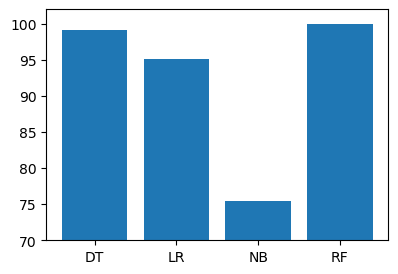

In [129]:
names = ['DT','LR','NB','RF']
values = [99.0838,95.0827,75.4274,99.9865]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(70,102)
plt.bar(names,values)

# TEST ACCURACY

<BarContainer object of 4 artists>

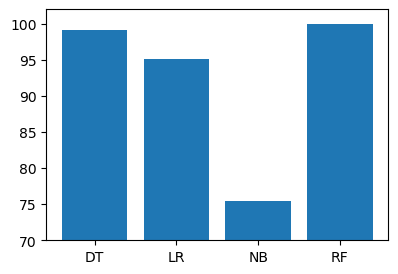

In [134]:
names = ['DT','LR','NB','RF']
values = [99.0689,95.1116,75.4274,99.9745]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(70,102)
plt.bar(names,values)

# TRAINING TIME

<BarContainer object of 4 artists>

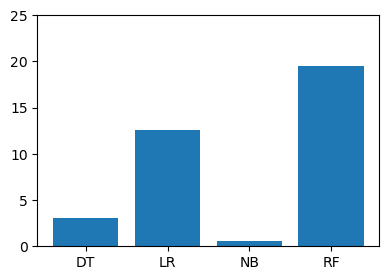

In [149]:
names = ['DT','LR','NB','RF']
values = [3.016832,12.535989,0.599255,19.520218]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(0,25)
plt.bar(names,values)

# TESTING TIME

<BarContainer object of 4 artists>

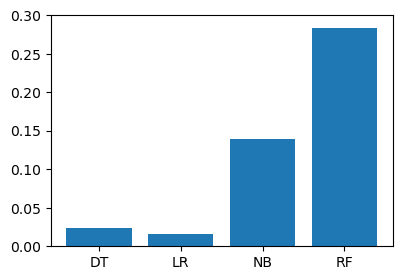

In [153]:
names = ['DT','LR','NB','RF']
values = [0.024205,0.016349,0.139145,0.284000]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(0,0.3)
plt.bar(names,values)

# Precision on Traning Set

<BarContainer object of 4 artists>

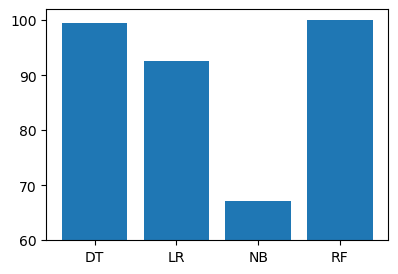

In [156]:
names = ['DT','LR','NB','RF']
values = [99.4304,92.6498,67.1471,99.9980]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(60,102)
plt.bar(names,values)

# Recall on Traning Set

<BarContainer object of 4 artists>

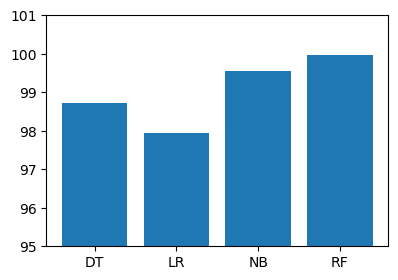

In [161]:
names = ['DT','LR','NB','RF']
values = [98.7327,97.9322,99.54903,99.97502]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(95,101)
plt.bar(names,values)

# F1 Score  on Traning Set

<BarContainer object of 4 artists>

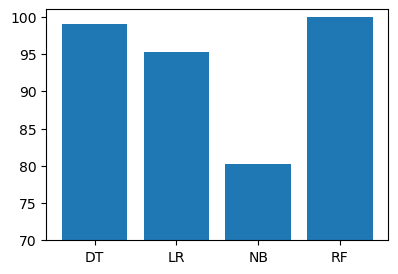

In [163]:
names = ['DT','LR','NB','RF']
values = [99.0804,95.2178,80.1989,99.9865]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(70,101)
plt.bar(names,values)